## Anweisung zur Durchführung der Datenfilterung und Weiterverarbeitung von Medien auf Tiktok

### Work in Process

<div style="background-color: red
; border-left: 6px solid #ffeb3b; padding: 8px; margin-top: 5px; margin-bottom: 5px;">
    <strong> Hinweis:</strong></strong> Diese Methode sammelt Metadaten zu allen Video-Veröffentlichungen von Tiktok. Es werden keine Tiktok-Photos verarbeitet. 
</div>


#### Tiktok Video-Link:
https://tiktok.com/@Kanalname/video/43664534324252233

#### Tiktok-Photo-Link:

~~https://toktok.com/@Kanalname/photo/436632342453252233~~

Im Rahmen unseres Projektes wurde eine umfassende Erhebung von nutzergenerierten Daten aus der Plattform TikTok durchgeführt. Diese Daten werden nun einer systematischen Aufbereitung und Filterung unterzogen, um sie für die anschließende Weiterverarbeitung vorzubereiten.

Ein wesentlicher Bestandteil dieses Prozesses ist die Identifikation deutscher Inhalte, welche durch speziell entwickelte Erkennungsverfahren erfolgt. Zudem findet eine manuelle Selektion statt, bei welcher durch den Einsatz einer Blacklist unerwünschte Kanäle ausgeschlossen werden.

________________

____________

### Datenbank sichten
Alle Feststellungen sind akribisch zu dokumentiet worden. Die sqlite3 Datenbank wird zur weiteren Verarbeitung in ein Dataframe überführt.

In [11]:
# Datenbankinhalt in einen Pandas-DataFrame laden

import pandas as pd
import sqlite3
def db_to_dataframe(db_name="tiktok_media_metadata.db"):
    conn = sqlite3.connect(db_name)
    query = "SELECT * FROM media_metadata"
    try:
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Fehler: {e}")
        return None
    finally:
        conn.close()

df = db_to_dataframe()

df

id                                                url  \
0      7453041971486133536  https://www.tiktok.com/@gereonbollmann/video/7...   
1      7446314527685201185  https://www.tiktok.com/@gereonbollmann/video/7...   
2      7430740655854390560  https://www.tiktok.com/@gereonbollmann/video/7...   
3      7429638543347076385  https://www.tiktok.com/@gereonbollmann/video/7...   
4      7424819005254405408  https://www.tiktok.com/@gereonbollmann/video/7...   
...                    ...                                                ...   
47705  7464527520298290454  https://www.tiktok.com/@dfb_patriot_afd/video/...   
47706  7464519534758710550  https://www.tiktok.com/@dfb_patriot_afd/video/...   
47707  7464918951403785494  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
47708  7464857918484106518  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
47709  7464586894207094038  https://www.tiktok.com/@christinabaumafd/video...   

                                                   title  \
0      Zur Lösung der angespannten Situation auf unse...   
1      Eine #Petition hat den Deutschen Bundestag err...   
2      Warum nur die Politik der AfD für Sicherheit i...   
3      Wir brauchen Erleichterungen für beruflich sel...   
4      Als Mitglied des Familienausschusses und Vorsi...   
...                                                  ...   
47705                                                      
47706  Vielen Dank @Björn Höcke ! #AfD #Deutschland #...   
47707  Heute früh nich Termin in Wahlkreis, Plakate a...   
47708  Wie kann man so ein Plakat zerstören?!?! Es is...   
47709                                                      

                                             description  duration  \
0      Zur Lösung der angespannten Situation auf unse...     173.0   
1      Eine #Petition hat den Deutschen Bundestag err...     154.0   
2      Warum nur die Politik der AfD für Sicherheit i...      56.0   
3      Wir brauchen Erleichterungen für beruflich sel...     232.0   
4      Als Mitglied des Familienausschusses und Vorsi...     228.0   
...                                                  ...       ...   
47705                                                          8.0   
47706  Vielen Dank @Björn Höcke ! #AfD #Deutschland #...     170.0   
47707  Heute früh nich Termin in Wahlkreis, Plakate a...      60.0   
47708  Wie kann man so ein Plakat zerstören?!?! Es is...       9.0   
47709                                                          8.0   

       view_count  like_count  repost_count  comment_count  \
0             912         113             1              8   
1             912         104             0              5   
2             891         103             1              8   
3             371          44             5              6   
4            1360         146             1              7   
...           ...         ...           ...            ...   
47705         371          45             0              4   
47706         404          98             1             12   
47707         450          82             0             13   
47708        2470          81             1             38   
47709          33           4             0              0   

                   uploader          uploader_id                    channel  \
0            gereonbollmann  7240807959155098651             GereonBollmann   
1            gereonbollmann  7240807959155098651             GereonBollmann   
2            gereonbollmann  7240807959155098651             GereonBollmann   
3            gereonbollmann  7240807959155098651             GereonBollmann   
4            gereonbollmann  7240807959155098651             GereonBollmann   
...                     ...                  ...                        ...   
47705       dfb_patriot_afd  7453023586542945302  🇩🇪 Der Kölsche Patriot 🇹🇷   
47706       dfb_patriot_afd  7453023586542945302  🇩🇪 Der Kölsche Patriot 🇹🇷   
47707  carolin_bachmann_mdb  7205

___________

## False-Positve-Filter

Dieser Prozess nutzt spezialisierte Erkennungsverfahren, um fälschlicherweise als positiv klassifizierte Sprachinhalte zu identifizieren und zu korrigieren. Folgende Schritte sind im verfahrenstechnischen Ablauf zu beachten:

Die Erkennung deutscher Sprachinhalte erfolgt durch das erstmalige Bereinigen der zu prüfenden Texte von  vorhandenen Hashtags.  Es werden analytische Maßnahmen angewendet, die anhand von Wahrscheinlichkeiten das Vorhandensein der deutschen Sprache innerhalb gegebener Inhalte bestätigen oder ablehnen.  Basierend auf den Ergebnissen wird der Datenbestand in besonders gekennzeichnete Textdateien geteilt, die dann zur weiteren Bearbeitung an die entsprechenden Stellen zugewiesen werden können.







In [12]:
import pandas as pd
from langdetect import detect_langs
import logging
from logging.handlers import RotatingFileHandler

# Einrichtung des Loggings mit RotatingFileHandler (max. 10 MB, dann Überschreibung)
logger = logging.getLogger("GermanDetection")
logger.setLevel(logging.DEBUG)
handler = RotatingFileHandler("process.log", maxBytes=10*1024*1024, backupCount=1)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

def is_german(text):
    try:
        # Entferne Hashtags, bevor die Sprache erkannt wird
        text_without_hashtags = ' '.join(word for word in text.split() if not word.startswith('#'))
        # Falls kein anderer Text nach dem Entfernen von Hashtags übrig bleibt
        if not text_without_hashtags.strip():
            return False

        # Erkennung der Sprache und Überprüfung der Wahrscheinlichkeit
        detected_languages = detect_langs(text_without_hashtags)
        for lang in detected_languages:
            if lang.lang == 'de' and lang.prob > 0.7:
                return True
        return False

    except Exception as e:
        logger.warning(f"Fehler beim Erkennen der Sprache: {e}")
        return False

logger.info("Starte Spracherkennung für DataFrame")

# Anwenden der Sprachprüfung auf Titel und Beschreibungen
df['german_title'] = df['title'].apply(is_german)
df['german_description'] = df['description'].apply(lambda x: is_german(x) if isinstance(x, str) else False)

logger.info("Spracherkennung abgeschlossen, gruppiere nach Uploader")

# Gruppierung nach Uploader und Aggregation der deutschen Inhalte
grouped = df.groupby('uploader').agg(
    total_entries=('title', 'count'),
    german_title_sum=('german_title', 'sum'),
    german_desc_sum=('german_description', 'sum')
)

grouped['german_average'] = (grouped['german_title_sum'] + grouped['german_desc_sum']) / (2 * grouped['total_entries'])

# Auswahl der Uploader, die den deutschen Schwellenwert erfüllen
eligible_uploaders = grouped[grouped['german_average'] > 0.5].index.tolist()
logger.info(f"Anzahl der gefilterten Uploader: {len(eligible_uploaders)}")

# Ermittlung der Uploader, die den Schwellenwert nicht erfüllen
all_uploaders = grouped.index.tolist()
non_eligible_uploaders = list(set(all_uploaders) - set(eligible_uploaders))
logger.info(f"Anzahl der nicht gefilterten Uploader: {len(non_eligible_uploaders)}")

# Filterung des ursprünglichen DataFrames nach den berechtigten Uploadern
result_df = df[df['uploader'].isin(eligible_uploaders)].copy()
logger.info(f"Ergebnis-DataFrame enthält {len(result_df)} Einträge")

# Ausgabe des gefilterten DataFrames in Jupyter Notebook
result_df

# Erstellen einer positives.txt mit detaillierten Informationen der gefilterten Einträge
with open("positives.txt", "w", encoding="utf-8") as f:
    for idx, row in result_df.iterrows():
        f.write(f"Uploader: {row['uploader']}\n")
        f.write(f"Title: {row['title']}\n")
        f.write(f"Description: {row.get('description', '')}\n")
        f.write("-" * 40 + "\n")

logger.info("positives.txt wurde erstellt.")

# Erstellen einer negatives.txt mit den unique Uploadern, die nicht die Kriterien erfüllen
with open("negatives.txt", "w", encoding="utf-8") as f:
    for uploader in non_eligible_uploaders:
        f.write(f"{uploader}\n")

logger.info("negatives.txt wurde erstellt.")


In [13]:
result_df

id                                                url  \
0      7453041971486133536  https://www.tiktok.com/@gereonbollmann/video/7...   
1      7446314527685201185  https://www.tiktok.com/@gereonbollmann/video/7...   
2      7430740655854390560  https://www.tiktok.com/@gereonbollmann/video/7...   
3      7429638543347076385  https://www.tiktok.com/@gereonbollmann/video/7...   
4      7424819005254405408  https://www.tiktok.com/@gereonbollmann/video/7...   
...                    ...                                                ...   
47703  7464547210571713815  https://www.tiktok.com/@afdclips4/video/746454...   
47704  7464502773598539030  https://www.tiktok.com/@afdclips4/video/746450...   
47707  7464918951403785494  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
47708  7464857918484106518  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
47709  7464586894207094038  https://www.tiktok.com/@christinabaumafd/video...   

                                                   title  \
0      Zur Lösung der angespannten Situation auf unse...   
1      Eine #Petition hat den Deutschen Bundestag err...   
2      Warum nur die Politik der AfD für Sicherheit i...   
3      Wir brauchen Erleichterungen für beruflich sel...   
4      Als Mitglied des Familienausschusses und Vorsi...   
...                                                  ...   
47703  was hält ihr davon? #afd #deutschland #germany...   
47704  Was haltet ihr davon? #afd #deutschland #germa...   
47707  Heute früh nich Termin in Wahlkreis, Plakate a...   
47708  Wie kann man so ein Plakat zerstören?!?! Es is...   
47709                                                      

                                             description  duration  \
0      Zur Lösung der angespannten Situation auf unse...     173.0   
1      Eine #Petition hat den Deutschen Bundestag err...     154.0   
2      Warum nur die Politik der AfD für Sicherheit i...      56.0   
3      Wir brauchen Erleichterungen für beruflich sel...     232.0   
4      Als Mitglied des Familienausschusses und Vorsi...     228.0   
...                                                  ...       ...   
47703  was hält ihr davon? #afd #deutschland #germany...      49.0   
47704  Was haltet ihr davon? #afd #deutschland #germa...      41.0   
47707  Heute früh nich Termin in Wahlkreis, Plakate a...      60.0   
47708  Wie kann man so ein Plakat zerstören?!?! Es is...       9.0   
47709                                                          8.0   

       view_count  like_count  repost_count  comment_count  \
0             912         113             1              8   
1             912         104             0              5   
2             891         103             1              8   
3             371          44             5              6   
4            1360         146             1              7   
...           ...         ...           ...            ...   
47703         873         189             1             14   
47704         796         100             2             12   
47707         450          82             0             13   
47708        2470          81             1             38   
47709          33           4             0              0   

                   uploader  ...             channel  \
0            gereonbollmann  ...      GereonBollmann   
1            gereonbollmann  ...      GereonBollmann   
2            gereonbollmann  ...      GereonBollmann   
3            gereonbollmann  ...      GereonBollmann   
4            gereonbollmann  ...      GereonBollmann   
...                     ...  ...                 ...   
47703             afdclips4  ...            AFDclips   
47704             afdclips4  ...            AFDclips   
47707  carolin_bachmann_mdb  ...  carolinbachmannmdb   
47708  carolin_bachmann_mdb  ...  carolinbachmannmdb   
47709      christinabaumafd  ...    ChristinaBaumAfD   

                                              channel_id  \
0      MS4w

__________

### Tiktok-Kanal-Blacklist anwenden

Gemäß der geltenden Dienstvorschrift ist eine umfassende Überprüfung der Tiktok-Kanäle vorzunehmen, wobei die bestehende Blacklist mit erhöhter Sorgfalt anzuwenden ist.



In [14]:
import pandas as pd
# Blacklist einlesen
with open('blacklist.txt', 'r') as file:
    blacklist = [line.strip() for line in file if line.strip()]

# Filterung des DataFrames: Behalte nur die Einträge, deren Uploader NICHT in der Blacklist ist
filtered_result_df = result_df[~result_df['uploader'].isin(blacklist)]

# Anzeigen des gefilterten DataFrames
filtered_result_df

id                                                url  \
0      7453041971486133536  https://www.tiktok.com/@gereonbollmann/video/7...   
1      7446314527685201185  https://www.tiktok.com/@gereonbollmann/video/7...   
2      7430740655854390560  https://www.tiktok.com/@gereonbollmann/video/7...   
3      7429638543347076385  https://www.tiktok.com/@gereonbollmann/video/7...   
4      7424819005254405408  https://www.tiktok.com/@gereonbollmann/video/7...   
...                    ...                                                ...   
47703  7464547210571713815  https://www.tiktok.com/@afdclips4/video/746454...   
47704  7464502773598539030  https://www.tiktok.com/@afdclips4/video/746450...   
47707  7464918951403785494  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
47708  7464857918484106518  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
47709  7464586894207094038  https://www.tiktok.com/@christinabaumafd/video...   

                                                   title  \
0      Zur Lösung der angespannten Situation auf unse...   
1      Eine #Petition hat den Deutschen Bundestag err...   
2      Warum nur die Politik der AfD für Sicherheit i...   
3      Wir brauchen Erleichterungen für beruflich sel...   
4      Als Mitglied des Familienausschusses und Vorsi...   
...                                                  ...   
47703  was hält ihr davon? #afd #deutschland #germany...   
47704  Was haltet ihr davon? #afd #deutschland #germa...   
47707  Heute früh nich Termin in Wahlkreis, Plakate a...   
47708  Wie kann man so ein Plakat zerstören?!?! Es is...   
47709                                                      

                                             description  duration  \
0      Zur Lösung der angespannten Situation auf unse...     173.0   
1      Eine #Petition hat den Deutschen Bundestag err...     154.0   
2      Warum nur die Politik der AfD für Sicherheit i...      56.0   
3      Wir brauchen Erleichterungen für beruflich sel...     232.0   
4      Als Mitglied des Familienausschusses und Vorsi...     228.0   
...                                                  ...       ...   
47703  was hält ihr davon? #afd #deutschland #germany...      49.0   
47704  Was haltet ihr davon? #afd #deutschland #germa...      41.0   
47707  Heute früh nich Termin in Wahlkreis, Plakate a...      60.0   
47708  Wie kann man so ein Plakat zerstören?!?! Es is...       9.0   
47709                                                          8.0   

       view_count  like_count  repost_count  comment_count  \
0             912         113             1              8   
1             912         104             0              5   
2             891         103             1              8   
3             371          44             5              6   
4            1360         146             1              7   
...           ...         ...           ...            ...   
47703         873         189             1             14   
47704         796         100             2             12   
47707         450          82             0             13   
47708        2470          81             1             38   
47709          33           4             0              0   

                   uploader  ...             channel  \
0            gereonbollmann  ...      GereonBollmann   
1            gereonbollmann  ...      GereonBollmann   
2            gereonbollmann  ...      GereonBollmann   
3            gereonbollmann  ...      GereonBollmann   
4            gereonbollmann  ...      GereonBollmann   
...                     ...  ...                 ...   
47703             afdclips4  ...            AFDclips   
47704             afdclips4  ...            AFDclips   
47707  carolin_bachmann_mdb  ...  carolinbachmannmdb   
47708  carolin_bachmann_mdb  ...  carolinbachmannmdb   
47709      christinabaumafd  ...    ChristinaBaumAfD   

                                              channel_id  \
0      MS4w

In [15]:
df = filtered_result_df

### df to database


Den gefilterten DataFrame in einer neuen SQLite-Datenbank mit der gleichen Tabellenstruktur abspeichern.

In [16]:
import sqlite3

# Funktion zum Speichern des DataFrames in eine neue SQLite-Datenbank
def save_filtered_df_to_new_db(df, new_db_name="filtered_tiktok_media_metadata.db"):
    # Verbindung zur neuen Datenbank herstellen (erstellt sie, falls nicht vorhanden)
    conn = sqlite3.connect(new_db_name)

    # Sicherstellen, dass der DataFrame die Spalten in der gleichen Reihenfolge wie die Originaldatenbank hat
    try:
        # Die Tabelle in der neuen Datenbank erstellen und Daten einfügen
        df.to_sql('media_metadata', conn, if_exists='replace', index=False)
        print(f"Gefilterter DataFrame wurde erfolgreich in {new_db_name} gespeichert.")
    except sqlite3.Error as e:
        print(f"Fehler beim Speichern des DataFrames: {e}")
    finally:
        conn.close()

# Aufruf der Funktion, um den result_df zu speichern
save_filtered_df_to_new_db(df)


Gefilterter DataFrame wurde erfolgreich in filtered_tiktok_media_metadata.db gespeichert.


In [17]:
# Datenbankinhalt in einen Pandas-DataFrame laden

import pandas as pd
import sqlite3
def db_to_dataframe(db_name="filtered_tiktok_media_metadata.db"):
    conn = sqlite3.connect(db_name)
    query = "SELECT * FROM media_metadata"
    try:
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Fehler: {e}")
        return None
    finally:
        conn.close()

df = db_to_dataframe()

df

id                                                url  \
0      7453041971486133536  https://www.tiktok.com/@gereonbollmann/video/7...   
1      7446314527685201185  https://www.tiktok.com/@gereonbollmann/video/7...   
2      7430740655854390560  https://www.tiktok.com/@gereonbollmann/video/7...   
3      7429638543347076385  https://www.tiktok.com/@gereonbollmann/video/7...   
4      7424819005254405408  https://www.tiktok.com/@gereonbollmann/video/7...   
...                    ...                                                ...   
16997  7464547210571713815  https://www.tiktok.com/@afdclips4/video/746454...   
16998  7464502773598539030  https://www.tiktok.com/@afdclips4/video/746450...   
16999  7464918951403785494  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
17000  7464857918484106518  https://www.tiktok.com/@carolin_bachmann_mdb/v...   
17001  7464586894207094038  https://www.tiktok.com/@christinabaumafd/video...   

                                                   title  \
0      Zur Lösung der angespannten Situation auf unse...   
1      Eine #Petition hat den Deutschen Bundestag err...   
2      Warum nur die Politik der AfD für Sicherheit i...   
3      Wir brauchen Erleichterungen für beruflich sel...   
4      Als Mitglied des Familienausschusses und Vorsi...   
...                                                  ...   
16997  was hält ihr davon? #afd #deutschland #germany...   
16998  Was haltet ihr davon? #afd #deutschland #germa...   
16999  Heute früh nich Termin in Wahlkreis, Plakate a...   
17000  Wie kann man so ein Plakat zerstören?!?! Es is...   
17001                                                      

                                             description  duration  \
0      Zur Lösung der angespannten Situation auf unse...     173.0   
1      Eine #Petition hat den Deutschen Bundestag err...     154.0   
2      Warum nur die Politik der AfD für Sicherheit i...      56.0   
3      Wir brauchen Erleichterungen für beruflich sel...     232.0   
4      Als Mitglied des Familienausschusses und Vorsi...     228.0   
...                                                  ...       ...   
16997  was hält ihr davon? #afd #deutschland #germany...      49.0   
16998  Was haltet ihr davon? #afd #deutschland #germa...      41.0   
16999  Heute früh nich Termin in Wahlkreis, Plakate a...      60.0   
17000  Wie kann man so ein Plakat zerstören?!?! Es is...       9.0   
17001                                                          8.0   

       view_count  like_count  repost_count  comment_count  \
0             912         113             1              8   
1             912         104             0              5   
2             891         103             1              8   
3             371          44             5              6   
4            1360         146             1              7   
...           ...         ...           ...            ...   
16997         873         189             1             14   
16998         796         100             2             12   
16999         450          82             0             13   
17000        2470          81             1             38   
17001          33           4             0              0   

                   uploader  ...             channel  \
0            gereonbollmann  ...      GereonBollmann   
1            gereonbollmann  ...      GereonBollmann   
2            gereonbollmann  ...      GereonBollmann   
3            gereonbollmann  ...      GereonBollmann   
4            gereonbollmann  ...      GereonBollmann   
...                     ...  ...                 ...   
16997             afdclips4  ...            AFDclips   
16998             afdclips4  ...            AFDclips   
16999  carolin_bachmann_mdb  ...  carolinbachmannmdb   
17000  carolin_bachmann_mdb  ...  carolinbachmannmdb   
17001      christinabaumafd  ...    ChristinaBaumAfD   

                                              channel_id  \
0      MS4w

__________________

____________________

## Verteilung der Videolänge des Videoarchivs


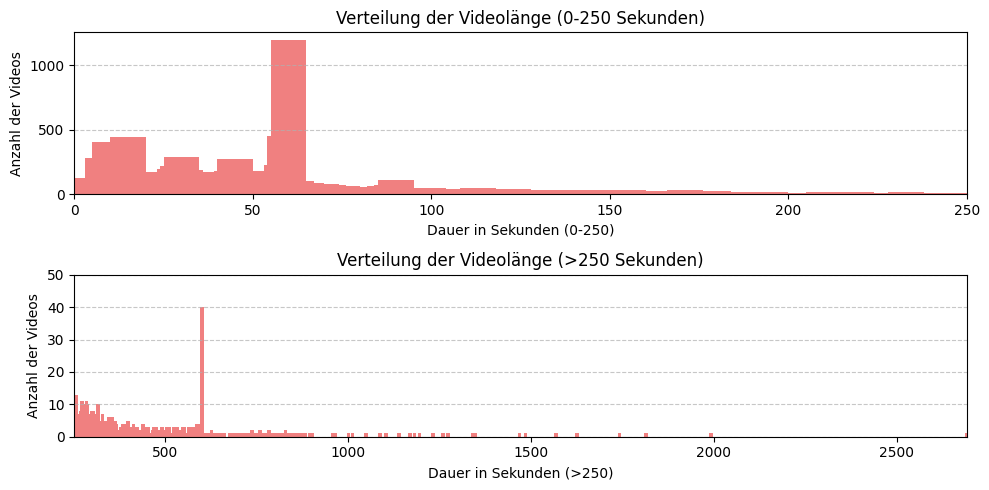

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Gesamtzeit in Sekunden berechnen
total_duration_seconds = df['duration'].sum()

# Gesamtzeit in Tage, Stunden, Minuten und Sekunden umrechnen
total_days = total_duration_seconds // (24 * 3600)
total_hours = (total_duration_seconds % (24 * 3600)) // 3600
total_minutes = (total_duration_seconds % 3600) // 60
total_seconds = total_duration_seconds % 60

# Häufigkeiten der Dauer berechnen
duration_counts = df['duration'].value_counts().sort_index()

# Erstelle eine Figur mit zwei Subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Erster Subplot: 0 bis 250 Sekunden
axes[0].bar(duration_counts.index, duration_counts.values, width=10.0, color='lightcoral')
axes[0].set_xlim(0, 250)
axes[0].set_xlabel('Dauer in Sekunden (0-250)')
axes[0].set_ylabel('Anzahl der Videos')
axes[0].set_title('Verteilung der Videolänge (0-250 Sekunden)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Zweiter Subplot: >250 Sekunden, mit y-Achse bis 50
axes[1].bar(duration_counts.index, duration_counts.values, width=10.0, color='lightcoral')
axes[1].set_xlim(251, df['duration'].max())
axes[1].set_ylim(0, 50)
axes[1].set_xlabel('Dauer in Sekunden (>250)')
axes[1].set_ylabel('Anzahl der Videos')
axes[1].set_title('Verteilung der Videolänge (>250 Sekunden)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout anpassen
plt.tight_layout()

# Diagramme anzeigen
plt.show()

# HTML-Text mit einfacher Struktur und einer kleinen Überschrift erstellen
html_content = f"""
<h3>Videogesamtdauer</h3>
<p>Sekunden: {total_duration_seconds:,}</p>
<p>Tage: {total_days}, Stunden: {total_hours}, Minuten: {total_minutes}, Sekunden: {total_seconds}</p>
"""

# HTML anzeigen
display(HTML(html_content))

________________


## How much is the fish?
### Wer hat die meistern Likes, Kommentare, Reposts oder Views ?

Die Programmlogik aggregiert Metriken wie Ansichten, Likes, Reposts und Kommentare pro Kanal. Danach werden die Top 50 Kanäle je Metrik gefiltert. Interaktive Balkendiagramme werden mit Altair erstellt.


In [49]:
import altair as alt
alt.renderers.enable('html')
#alt.renderers.enable('default')


RendererRegistry.enable('html')

In [50]:
import pandas as pd
from IPython.display import HTML, display

# Summe für jede Metrik pro Channel 
columns_to_plot = ["view_count", "like_count", "repost_count", "comment_count"]
aggregated_data = (
    df.groupby(["channel", "channel_url", "uploader"])[columns_to_plot].sum().reset_index()
    .melt(id_vars=["channel", "channel_url", "uploader"], var_name="metric", value_name="value")
)

# Top 50 Channels nach Metrik
def get_top_50(df, metric_column):
    top_50_channels = (
        df[df["metric"] == metric_column]
        .nlargest(50, "value")["channel"]
        .unique()
    )
    return df[df["channel"].isin(top_50_channels)]

filtered_data = pd.concat([get_top_50(aggregated_data, metric) for metric in columns_to_plot])

# Interaktive Balkendiagramme 
charts = []
for metric in columns_to_plot:
    chart = (
        alt.Chart(filtered_data[filtered_data["metric"] == metric])
        .mark_bar()
        .encode(
            x=alt.X("channel:O", title="Channel", sort="-y", axis=alt.Axis(labelAngle=-45)),
            y=alt.Y("value:Q", title=f"Total {metric.capitalize()}"),
            color=alt.Color("channel:N", legend=None),
            tooltip=[
                alt.Tooltip("channel:N", title="Channel"),
                alt.Tooltip("uploader:N", title="Uploader"),
                alt.Tooltip("value:Q", title=f"Total {metric.capitalize()}"),
            ],
        )
        .properties(
            title=f"Total {metric.capitalize()} by Channel",
            height=300,
            width=580  # Setze die Breite auf 500
        )
    )
    # Trennelement
    separator = (
        alt.Chart(pd.DataFrame({"y": [0]}))
        .mark_rule(strokeDash=[5, 5], size=1)
        .encode(y=alt.Y("y:Q", axis=None))
        .properties(height=10, width=500)
    )
    charts.extend([chart, separator])

# Subplots 
final_chart = alt.vconcat(*charts).resolve_scale(color="independent")

# Config
final_chart = final_chart.configure_axis(
    labelFontSize=7,
    titleFontSize=16
)

# Wandelt den Chart in JSON um
chart_json = final_chart.to_json()


display(HTML(html_template))


____________

## TOP 88 Nutzerinteraktionen

Die nachfolgende Darstellung mittels Altair-Visualisierungssystem erfolgte in Form von Balkendiagrammen, welche gezielte Metriken wie Aufrufe, Bewertungen, Weiterverbreitungen und Kommentare aufzeigten. Die Interaktive Angereicherung erfolgte via Tooltip-Funktionalitäten, welche eine erweiterte Informationstiefe ermöglichten.

In [51]:
import pandas as pd
import altair as alt

# Annahme: Der DataFrame `df` ist bereits aus der Datenbank geladen

# Blacklist aus `blacklist.txt` laden
with open('blacklist.txt', 'r') as file:
    blacklist = {line.strip() for line in file if line.strip()}

# DataFrame filtern: Einträge ausschließen, deren Uploader in der Blacklist ist
df_filtered = df[~df['uploader'].isin(blacklist)]

columns_to_plot = ["view_count", "like_count", "repost_count", "comment_count"]
top_n = 88  # Für Altair-Plot
charts = []

# Altair-Plot für die Top 50 Einträge pro Metrik
for col in columns_to_plot:
    # Top 50 Einträge für die jeweilige Spalte auswählen und absteigend sortieren
    df_sorted = df_filtered.nlargest(top_n, col).sort_values(by=col, ascending=False).copy()
    # Labels kürzen, um nur den Uploader anzuzeigen
    df_sorted["channel_label"] = df_sorted["uploader"]
    
    chart = (
        alt.Chart(df_sorted)
        .mark_bar(size=16)  # Breitere Balken
        .encode(
            x=alt.X(f"{col}:Q", 
                    title=col.capitalize(), 
                    axis=alt.Axis(format=".2s")),  # Tausender mit 'K' abgekürzt
            y=alt.Y("channel_label:N",
                    title="Uploader",
                    sort=df_sorted["channel_label"].tolist()),
            color=alt.Color("uploader:N", title="Uploader",
                            legend=alt.Legend(orient='right', title="Uploader")),
            tooltip=[
                "url", 
                "title", 
                "duration", 
                "view_count", 
                "like_count", 
                "repost_count", 
                "comment_count"
            ],
            href="url:N"  # Beim Klicken auf den Balken wird die URL geöffnet
        )
        .properties(
            title=f"Top {top_n} - {col.capitalize()}",
            width=500,  # Maximale Breite auf 600 begrenzt
            height=500,
        )
    )
    charts.append(chart)

# Alle Subplots vertikal anordnen
final_chart = alt.vconcat(*charts)
final_chart.show()

alt.VConcatChart(...)

_____________

### Veröffentlichungen pro Tag 

Das Skript verarbeitet Daten zu Videoveröffentlichungen, wandelt Zeitstempel in jahres- und tagesbezogene Formate um und gruppiert sie nach Jahr, Tag und Kanal, um die Anzahl der Veröffentlichungen zu zählen. Anschließend erstellt es ein facettiertes Balkendiagramm, das die tägliche Veröffentlichungsaktivität pro Jahr und Kanal visualisiert.

Unter den Ausgewählten Kanälen lassen sich somit viele Trends in der Nutzung abbilden.

In [58]:
import pandas as pd
import altair as alt

# Zeilenbegrenzung in Altair deaktivieren
alt.data_transformers.disable_max_rows()

# Angenommen, df existiert und enthält eine 'timestamp' Spalte
# Erstelle eine Kopie des DataFrames
df_copy = df.copy()

# Zeitbezogene Spalten erstellen
df_copy["datetime"] = pd.to_datetime(df_copy["timestamp"], unit='s')
df_copy["year"] = df_copy["datetime"].dt.year
df_copy["day"] = df_copy["datetime"].dt.floor('D')

# Gruppierung: Anzahl der Videos pro Tag und Uploader zählen
df_counts = (
    df_copy.groupby(["year", "day", "uploader", "channel_url"])  # uploader anstelle von channel
    .size()
    .reset_index(name='count')
)

# Sicherstellen, dass 'day' im richtigen Format vorliegt
df_counts["day"] = pd.to_datetime(df_counts["day"])

# Altair-Chart erstellen: Subplot für jedes Jahr mit jahresspezifischer x-Achse
chart = alt.Chart(df_counts).mark_bar().encode(
    x=alt.X("day:T", 
            title="Datum", 
            scale=alt.Scale(nice=False)),
    y=alt.Y("sum(count):Q", title="Anzahl Veröffentlichungen"),
    color=alt.Color("uploader:N", title="Uploader",
                    legend=alt.Legend(orient="right", labelFontSize=12, titleFontSize=14)),
    tooltip=[
        alt.Tooltip("day:T", title="Datum"),
        alt.Tooltip("uploader:N", title="Uploader"),
        alt.Tooltip("sum(count):Q", title="Veröffentlichungen")
    ],
    href="channel_url:N"  # Link als klickbarer Button
).properties(
    width=500  # Setze die Breite nach Bedarf
).facet(
    row=alt.Row("year:N", title="Jahr")
).resolve_scale(
    x="independent",
    y="independent"
)

chart

alt.FacetChart(...)

____________

## Hashtag-Wortwolke

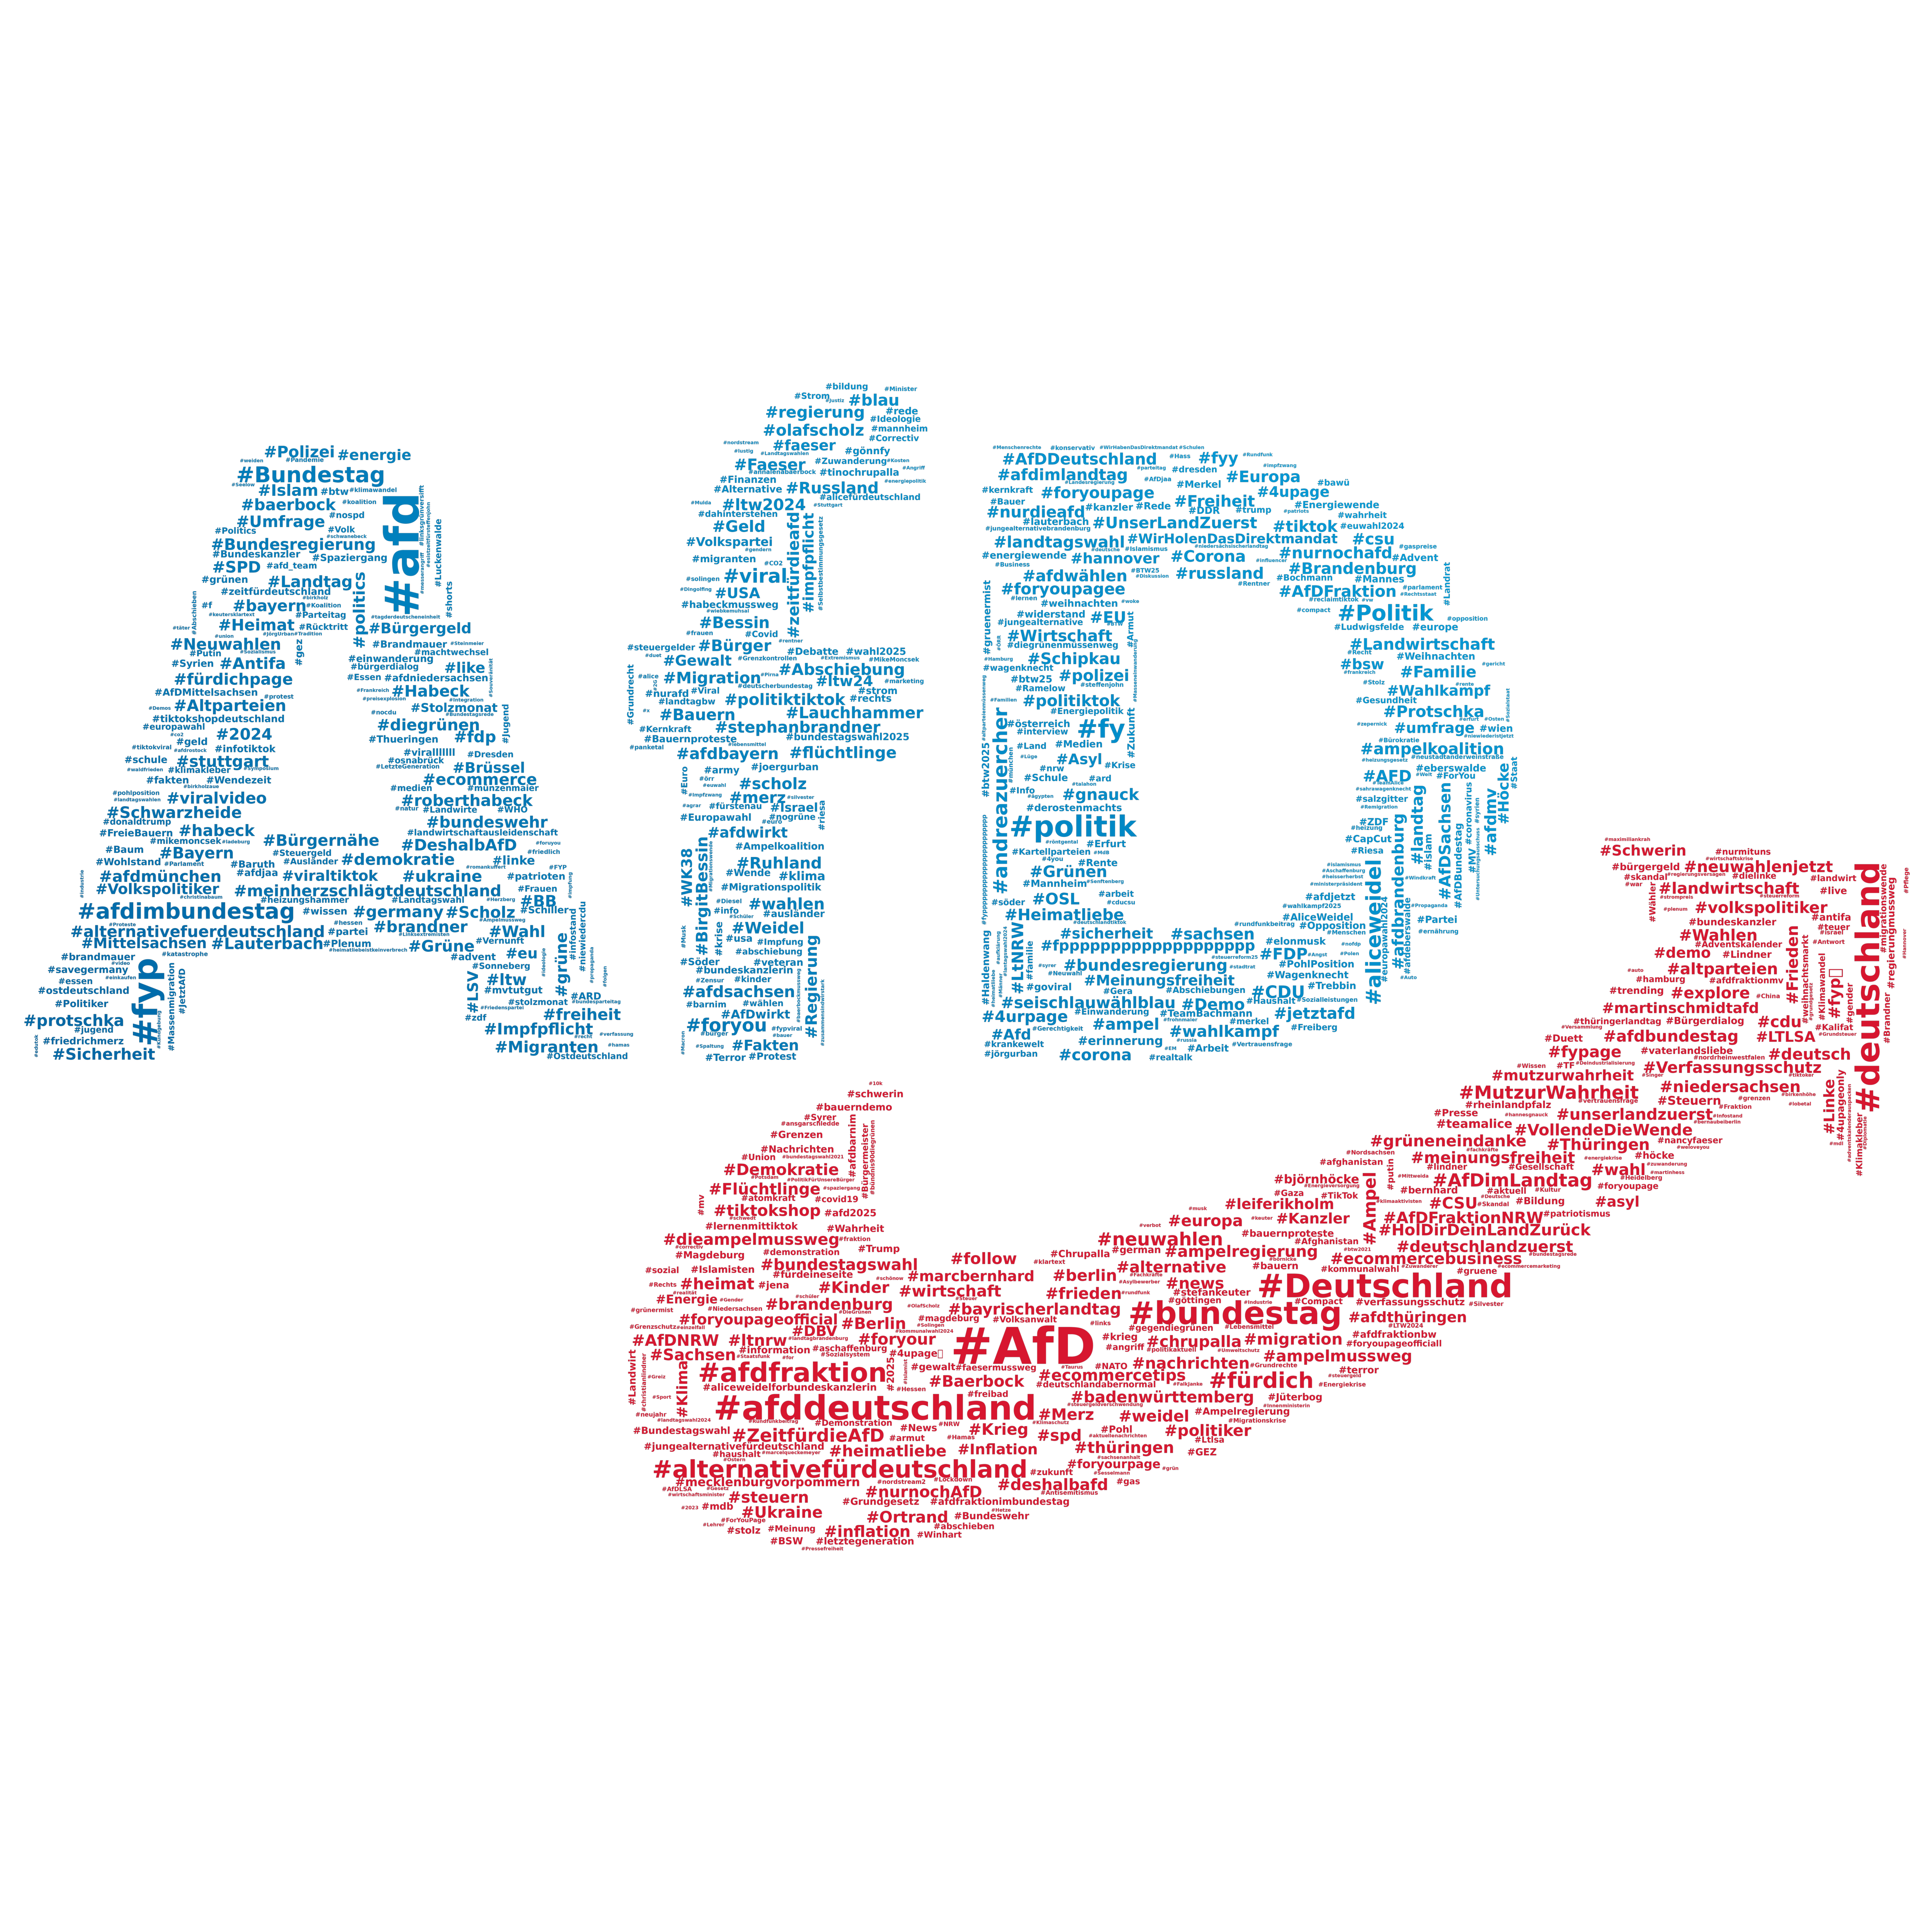

In [53]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans

# Bild laden und in ein numpy-Array umwandeln für die Masken- und Farbdaten
image_path = 'logo_postprocess.png'
mask = np.array(Image.open(image_path))
image_color = Image.open(image_path).convert('RGB')
np_image_rgb = np.array(image_color)

# Farbfunktion, die die Farbe jedes Wortes basierend auf seiner Position im Bild zuweist
def precise_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    x = int(position[1] + font_size / 2)
    y = int(position[0] + font_size / 2)
    if x >= np_image_rgb.shape[1] or y >= np_image_rgb.shape[0]:
        return "rgb(255, 255, 255)"  # Rückgabe weißer Farbe als Fallback
    color = np_image_rgb[y, x]
    return "rgb({},{},{})".format(color[0], color[1], color[2])

# Alle Hashtags aus der "title" Spalte extrahieren
all_text = ' '.join(df['title'].dropna())
hashtags = re.findall(r'#\w+', all_text)

# Zähle die Häufigkeit jedes Hashtags
hashtag_freq = pd.Series(hashtags).value_counts().to_dict()

# Erzeugen der Wortwolke von Hashtags
wc = WordCloud(
    background_color=None,  
    mode="RGBA",
    max_words=7800,
    mask=mask,
    scale=8,
    color_func=precise_color_func,
    font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
    max_font_size=42
).generate_from_frequencies(hashtag_freq)

# Anzeigen der Wortwolke
plt.figure(figsize=(60, 60))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("high_quality_wordcloud_hashtags.png", format='png')
plt.show()